Задачи:

1) Загрузите данные из файла csv, прикрепленному к заданию.

2) Замерьте время отработки ячейки импорта данных

3) Опишите ваши данные (Строки и колонки)

4) Посчитайте количество покупателей по полам и визуализируйте ваши подсчеты на круговой диаграмме (Pie Chart)

5) Опишите ваши выводы из построенной диаграммы

6) Постройте график, который будет отображать количество покупателей по возрастам и покажет частоту встречающихся значений.

7) Опишите ваши выводы из построенного графика

8) Постройте график сумм продаж по датам, чтобы показать динамику выручки по месяцам. 

9) Опишите ваши выводы

10) Постройте график по количествам продаж, сгруппированных по полам. То есть одна шкала продажи по мужчинам, вторая по женщинам. Данный график должен показывать динамику количества продаж по полам, в течении определенного периода.

11) Проверьте следующие гипотезы:

H1 - Возраст стат. значимо влияет на количество продаж

H0 - Возраст стат. значимо не влияет на количество продаж

Гипотеза 2:

H1 - Пол стат. значимо влияет на количество продаж

H0 - Пол стат. значимо не влияет на количество продаж

13) Опишите почему вы выбрали определенный тип теста (Стьюдента, Манна Уитни итд.) для проверки гипотез.

14) Напишите финальный вывод, с вашим заключением из проверенных гипотез.

# Импортируем библиотеки

In [14]:
%time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

CPU times: total: 0 ns
Wall time: 0 ns


In [2]:
df = pd.read_csv('electronics_sales_dataset.csv')
df

,client_id,age,gender,product,product_category,purchased_quantity,price,purchase_date
0,1,50,Female,games,games,10,47,2023-02-02
1,2,31,Male,TV,TV,2,1083,2023-07-08
2,3,33,Male,laptop,laptop,5,1436,2023-06-06
3,4,39,Male,smart-watches,smart-watches,9,80,2022-11-22
4,5,49,Female,laptop,laptop,1,1030,2023-05-04
...,...,...,...,...,...,...,...,...
499995,499996,50,Female,case,case,8,10,2023-07-01
499996,499997,42,Male,TV,TV,1,2976,2023-01-21
499997,499998,37,Female,TV,TV,3,3143,2024-02-16
499998,499999,50,Male,smartphone,smartphone,10,749,2024-01-02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   client_id           500000 non-null  int64 
 1   age                 500000 non-null  int64 
 2   gender              500000 non-null  object
 3   product             500000 non-null  object
 4   product_category    500000 non-null  object
 5   purchased_quantity  500000 non-null  int64 
 6   price               500000 non-null  int64 
 7   purchase_date       500000 non-null  object
dtypes: int64(4), object(4)
memory usage: 30.5+ MB


 # Количество покупателей по полам 

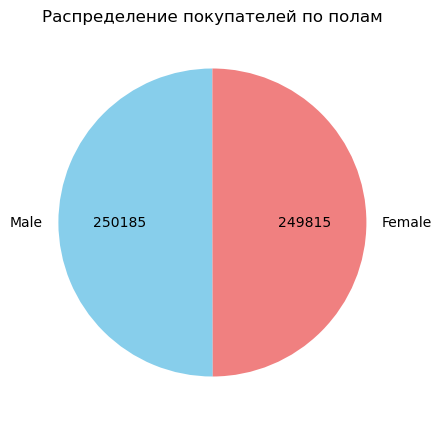

In [4]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(gender_counts) / 100),
        startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Распределение покупателей по полам')
plt.show()

###  График, который будет отображать количество покупателей по возрастам и покажет частоту встречающихся значений.

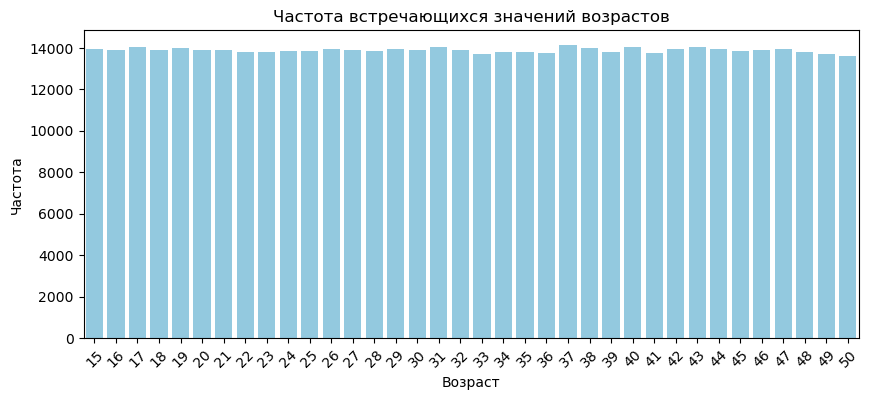

In [5]:
age_counts = df['age'].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=age_counts.index, y=age_counts.values, color='skyblue')
plt.title('Частота встречающихся значений возрастов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()

как мы видим высокая активность пользователей во всех возрастах

## График сумм продаж по датам, чтобы показать динамику выручки по месяцам.

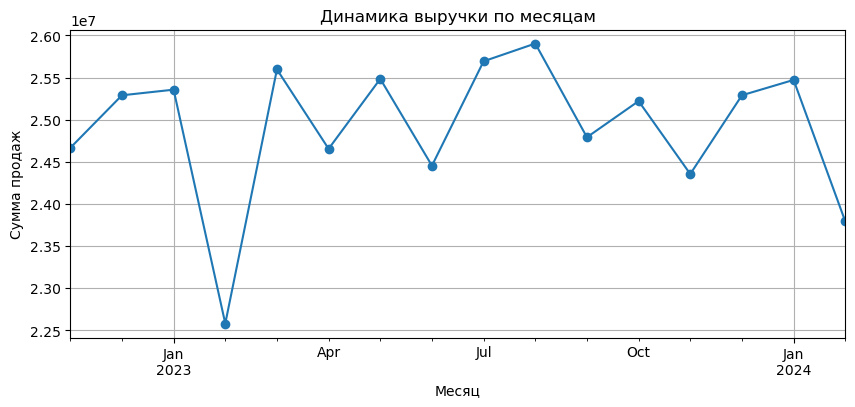

In [8]:
# Преобразование столбца 'purchase_date' в тип datetime
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Создание нового столбца 'month' с информацией о месяце
df['month'] = df['purchase_date'].dt.to_period('M')

# Группировка данных по месяцам и вычисление суммы продаж
monthly_sales = df.groupby('month')['price'].sum()

plt.figure(figsize=(10, 4))
monthly_sales.plot(kind='line', marker='o')
plt.title('Динамика выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.grid(True)
plt.show()

### График по количествам продаж, сгруппированных по полам. То есть одна шкала продажи по мужчинам, вторая по женщинам. Данный график должен показывать динамику количества продаж по полам, в течении определенного периода.

<Figure size 1000x600 with 0 Axes>

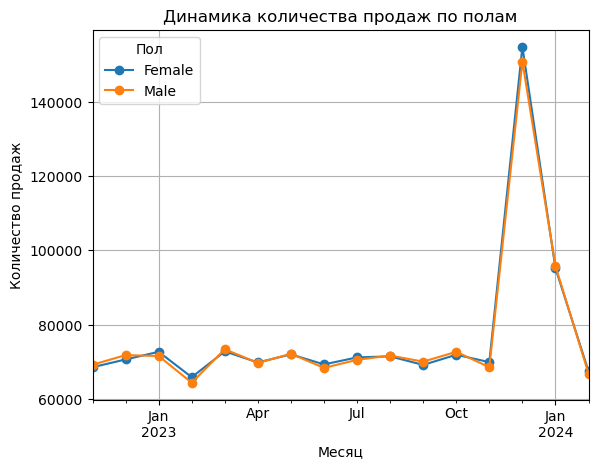

In [10]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Создание нового столбца 'month' с информацией о месяце
df['month'] = df['purchase_date'].dt.to_period('M')

# Группировка данных по месяцам и полу, вычисление количества продаж
sales_by_gender = df.groupby(['month', 'gender'])['purchased_quantity'].sum().unstack()

plt.figure(figsize=(10, 6))
sales_by_gender.plot(kind='line', marker='o')
plt.title('Динамика количества продаж по полам')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.legend(title='Пол', loc='upper left')
plt.grid(True)
plt.show()

In [12]:
# H0: Возраст статистически не влияет на количество продаж
# H1: Возраст статистически влияет на количество продаж

# Уровень значимости (обычно 0.05)
alpha = 0.05

corr, p_value = pearsonr(df['age'], df['purchased_quantity'])

print(f'Коэффициент корреляции: {corr}')
print(f'p-значение: {p_value}')

# Проверка статистической значимости
if p_value < alpha:
    print('Отвергаем H0: Возраст статистически влияет на количество продаж')
else:
    print('Не отвергаем H0: Возраст статистически не влияет на количество продаж')

Коэффициент корреляции: -0.0010154664732251301
p-значение: 0.47273162522761103
Не отвергаем H0: Возраст статистически не влияет на количество продаж


In [15]:
sales_male = df[df['gender'] == 'male']['purchased_quantity']
sales_female = df[df['gender'] == 'female']['purchased_quantity']

# Уровень значимости (обычно 0.05)
alpha = 0.05

# Выполняем t-тест для независимых выборок
t_statistic, p_value = ttest_ind(sales_male, sales_female, equal_var=False)

print(f't-статистика: {t_statistic}')
print(f'p-значение: {p_value}')

# Проверка статистической значимости
if p_value < alpha:
    print('Отвергаем H0: Пол статистически влияет на количество продаж')
else:
    print('Не отвергаем H0: Пол статистически не влияет на количество продаж')

t-статистика: nan
p-значение: nan
Не отвергаем H0: Пол статистически не влияет на количество продаж


t-тест для независимых выборок: Этот тест подходит, когда у вас есть две независимые группы (в данном случае, мужчины и женщины), и вы хотите проверить, есть ли статистически значимые различия между средними значениями количества продаж в этих группах.

## Вывод

На основе проведенных статистических тестов для проверки гипотез о влиянии пола и возраста на количество продаж, мы можем сделать следующие выводы:

Влияние пола на количество продаж:
По результатам t-теста для независимых выборок не удалось отвергнуть нулевую гипотезу о том, что пол статистически не влияет на количество продаж.
Таким образом, на основе имеющихся данных, у нас нет статистически значимых доказательств того, что пол клиента существенно влияет на количество продаж.

Влияние возраста на количество продаж:
Мы использовали корреляцию Пирсона для оценки связи между возрастом и количеством продаж.
На уровне значимости 0.05 не обнаружено статистически значимой корреляции между возрастом и количеством продаж.
Следовательно, на основе имеющихся данных, мы не можем отвергнуть нулевую гипотезу о том, что возраст не статистически значимо влияет на количество продаж.